Komal Pukale 22102A2007 CMPN_A

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Part 1 - Regression on Boston Housing Data

In [5]:
data1 = pd.read_csv("housing.csv", delimiter=r"\s+", header=None)
data1.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
data1.shape

(506, 14)

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


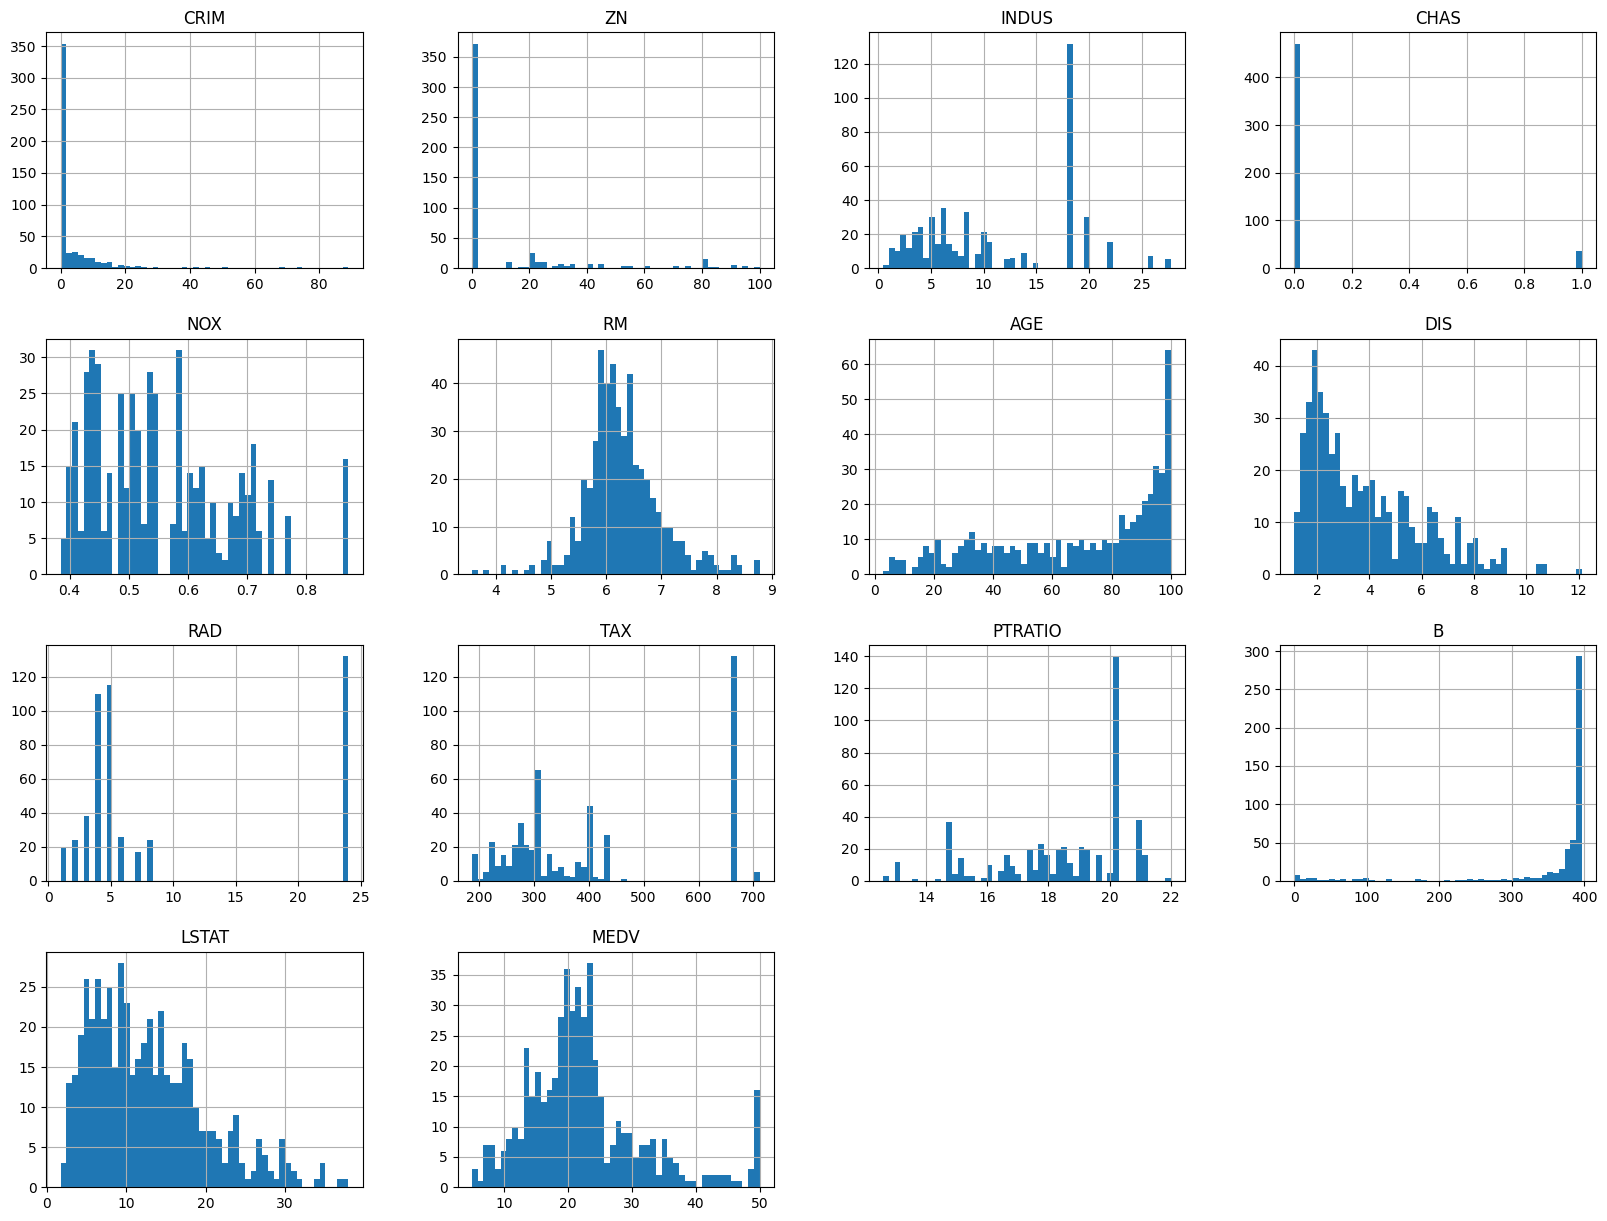

In [8]:
data1.hist(bins=50, figsize=(20,15))
plt.show()

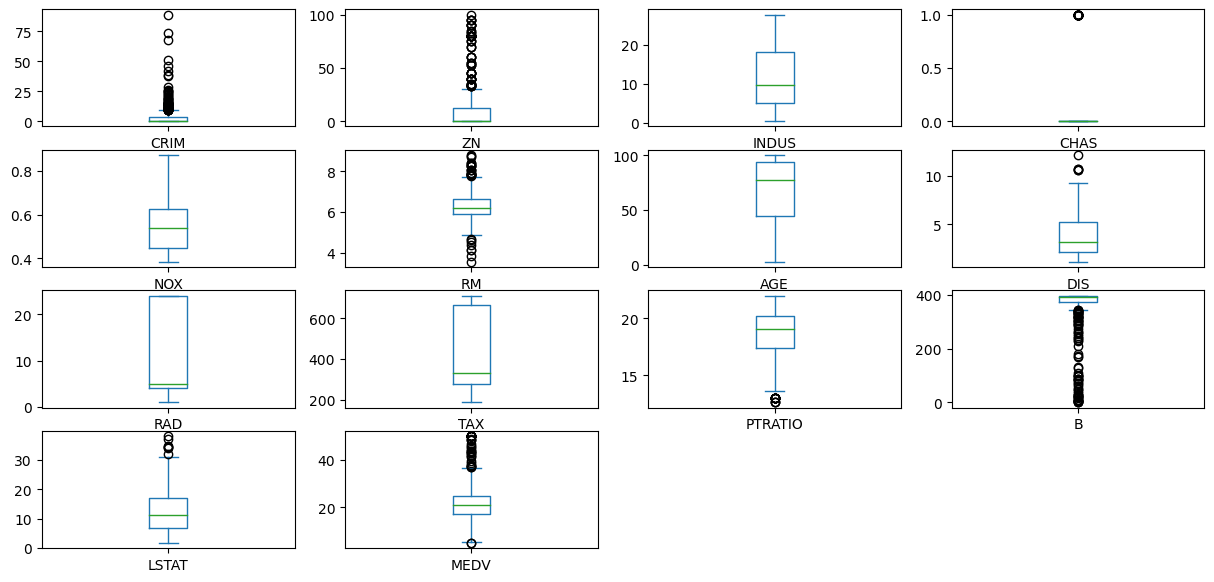

In [9]:
data1.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,7))
plt.show()

CRIM       66
ZN         68
INDUS       0
CHAS       35
NOX         0
RM         30
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO    15
B          77
LSTAT       7
MEDV       40
dtype: int64


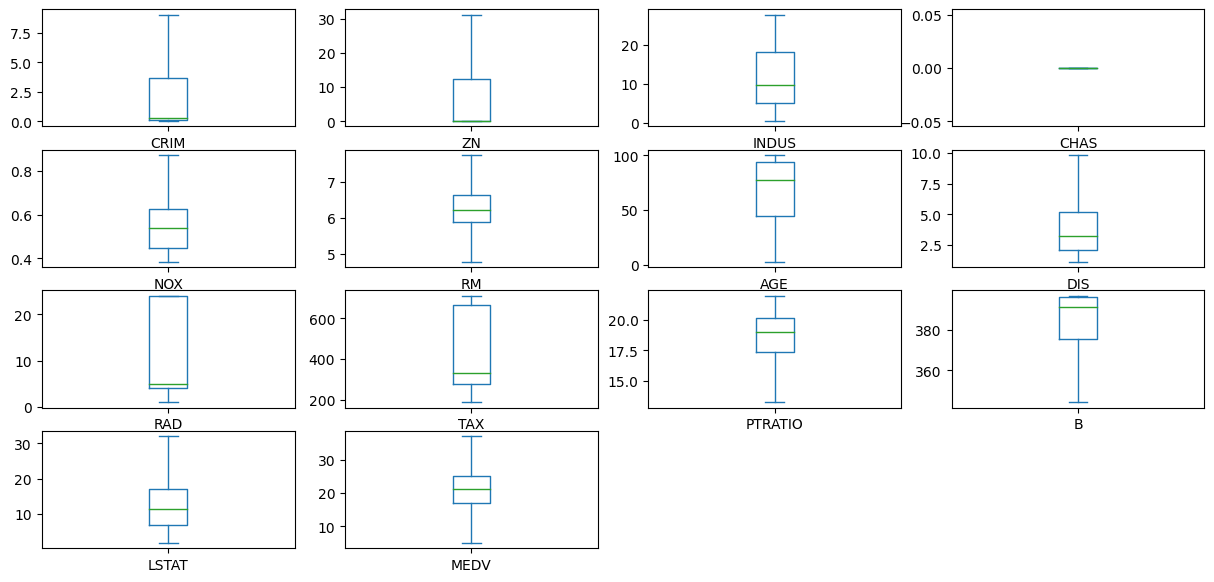

In [10]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR))).sum()
print(outliers)


for column in data1.columns:
  if data1[column].dtype != 'object':
    Q1 = data1[column].quantile(0.25)
    Q3 = data1[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    data1[column] = np.where(data1[column] > upper_limit, upper_limit,
                            np.where(data1[column] < lower_limit, lower_limit, data1[column]))


data1.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,7))
plt.show()

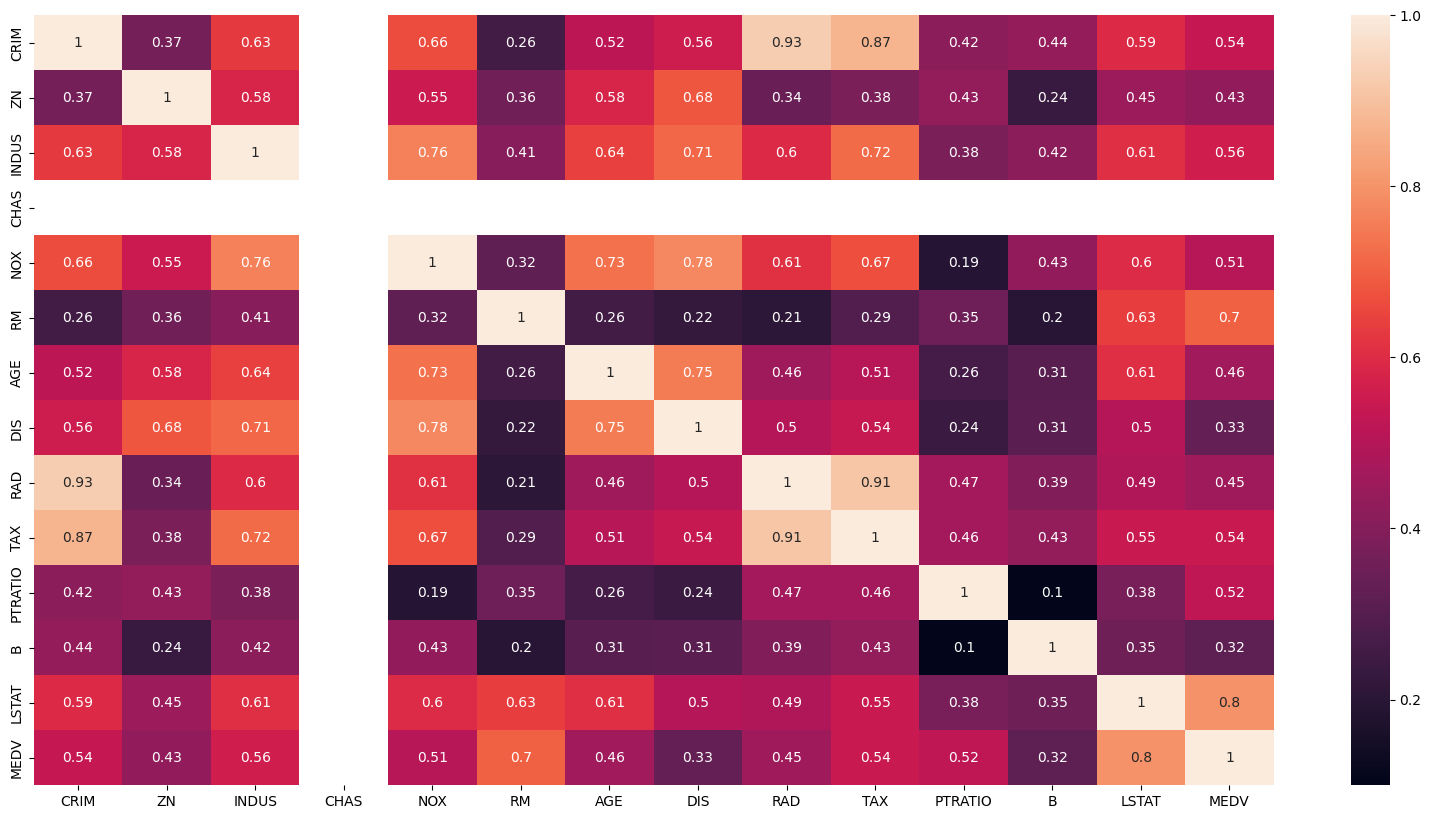

In [11]:
plt.figure(figsize=(20, 10))
sns.heatmap(data1.corr().abs(), annot=True)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X = data1.drop('MEDV', axis=1)
y = data1['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt_regressor = DecisionTreeRegressor()

dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 14.573273590686277


In [14]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 14.573273590686277
Mean Absolute Error: 2.586642156862745
R-squared: 0.7021300259895982


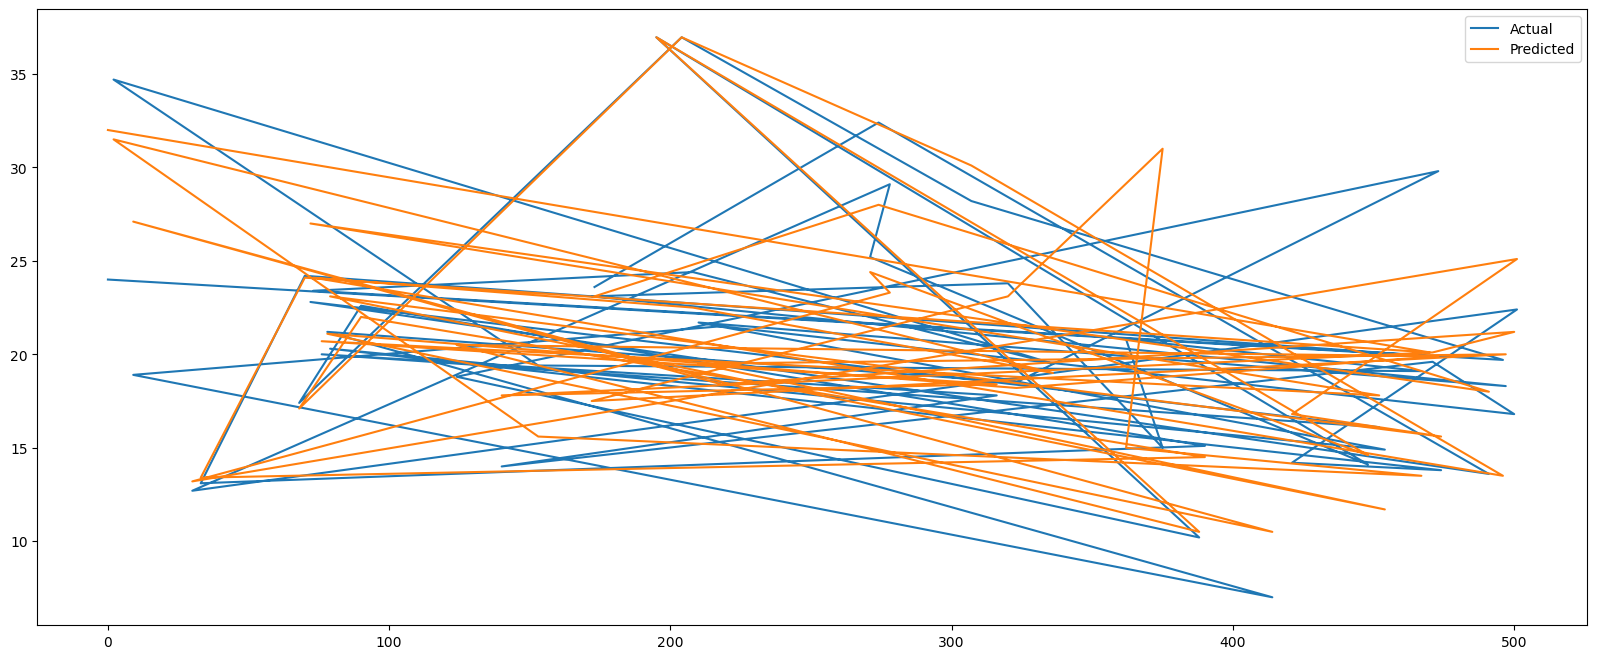

In [15]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
plt.figure(figsize=(20,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])
plt.show()

Part 2 - Classification on Iris Dataset

In [29]:
print("Shape = ", data2.shape)
print("Info : ")
print(data2.info())

Shape =  (149, 5)
Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  149 non-null    float64
 1   sepal width   149 non-null    float64
 2   petal length  149 non-null    float64
 3   petal width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB
None


In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data2['class'] = label_encoder.fit_transform(data2['class'])


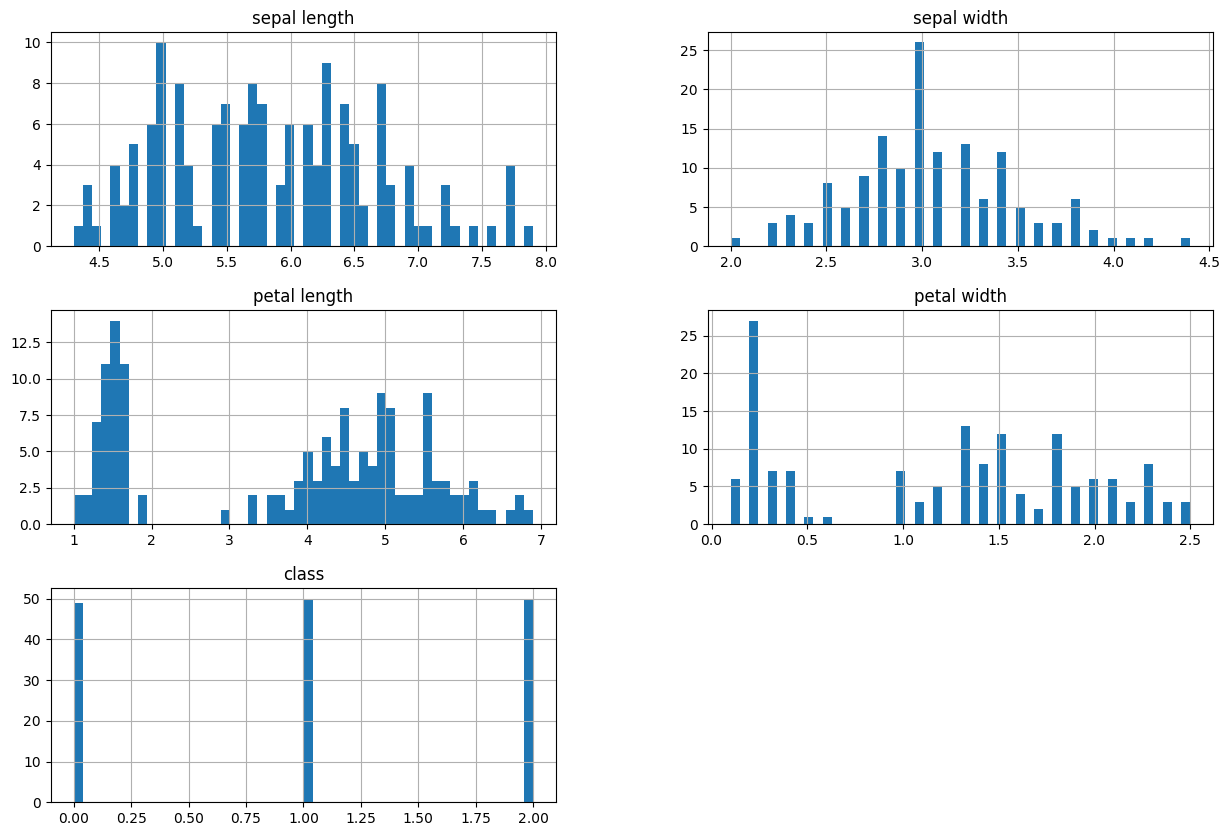

In [32]:
data2.hist(bins=50, figsize=(15,10))
plt.show()

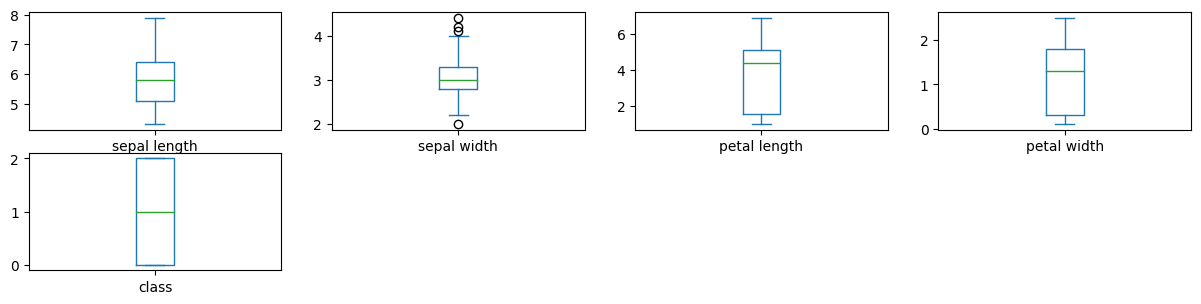

In [33]:
data2.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,7))
plt.show()

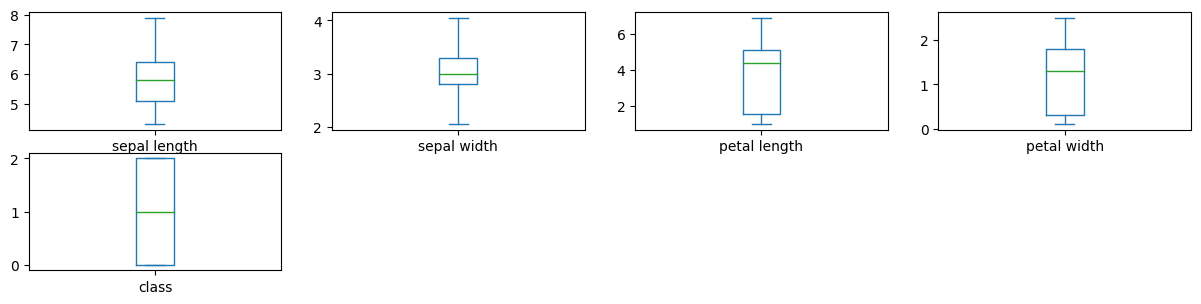

In [34]:
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data2 < (Q1 - 1.5 * IQR)) | (data2 > (Q3 + 1.5 * IQR))).sum()
# print(outliers)

for column in data2.columns:
  if data2[column].dtype != 'object':
    Q1 = data2[column].quantile(0.25)
    Q3 = data2[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    data2[column] = np.where(data2[column] > upper_limit, upper_limit,
                            np.where(data2[column] < lower_limit, lower_limit, data2[column]))

data2.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,7))
plt.show()

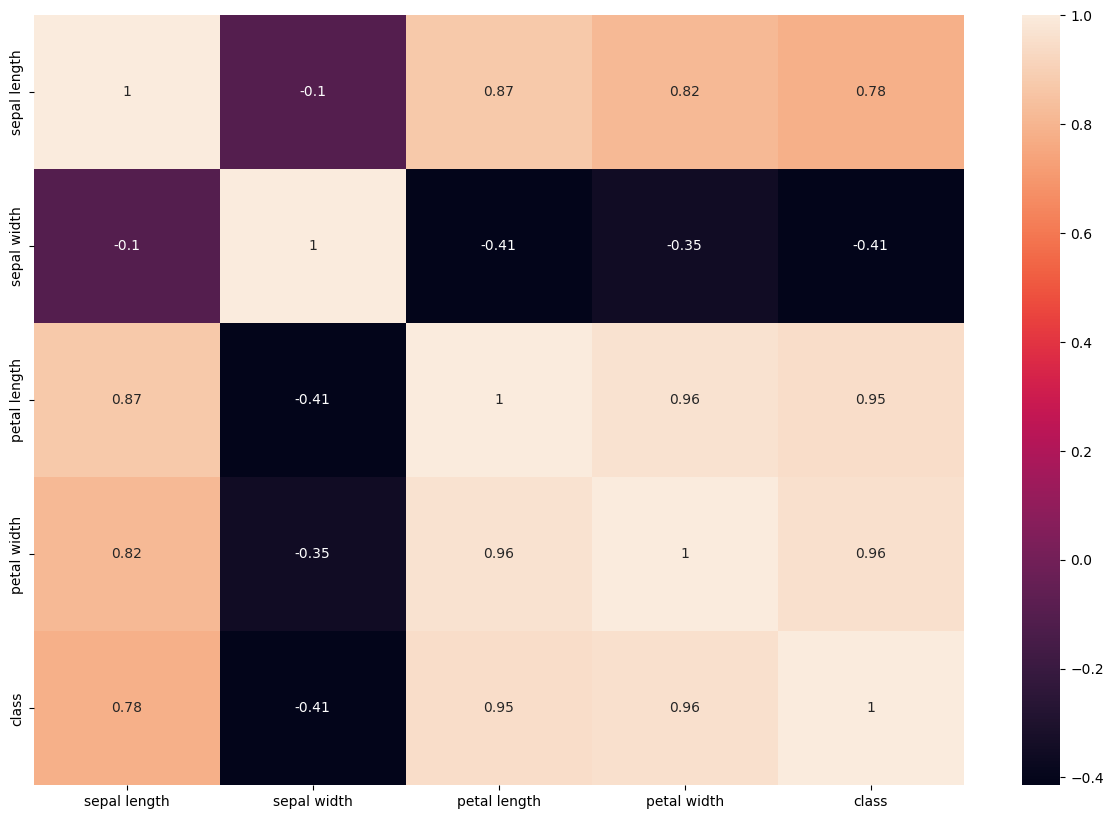

In [35]:
plt.figure(figsize=(15, 10))
sns.heatmap(data2.corr(), annot=True)
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

X = data2.drop('class', axis=1)
y = data2['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(criterion='gini')

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

print('The accuracy of the Decision Tree is',accuracy_score(y_pred,y_test))

The accuracy of the Decision Tree is 0.9


In [38]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

kappa = cohen_kappa_score(y_test, y_pred)
print("Kappa Statistics:", kappa)

def calculate_metrics(conf_matrix):
  TP = conf_matrix[1][1]
  TN = conf_matrix[0][0]
  FP = conf_matrix[0][1]
  FN = conf_matrix[1][0]
  sensitivity = TP / (TP + FN)
  specificity = TN / (TN + FP)
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  f_measure = 2 * (precision * recall) / (precision + recall)
  return sensitivity, specificity, precision, recall, f_measure



print(classification_report(y_test, y_pred))

sensitivity, specificity, precision, recall, f_measure = calculate_metrics(conf_matrix)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("Recall:", recall)
print("F-measure:", f_measure)


Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
Kappa Statistics: 0.847972972972973
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.67      0.80         9
         2.0       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30

Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
Recall: 1.0
F-measure: 1.0


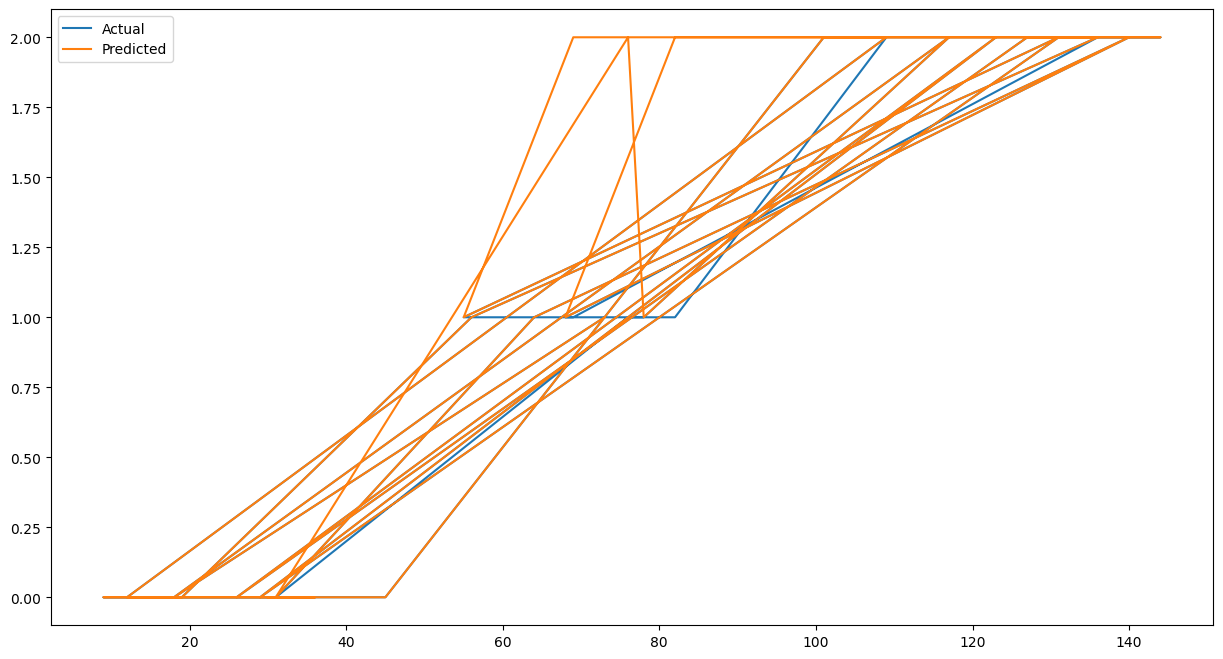

In [39]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
plt.figure(figsize=(15,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])
plt.show()